## Sklearn - KBinsDiscretizer (https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html#sphx-glr-auto-examples-preprocessing-plot-discretization-py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
# construct dataset

rnd = np.random.RandomState(42)
X=rnd.uniform(-3,3,size=100)
y=np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1,1)

In [3]:
## transform dataset with KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)

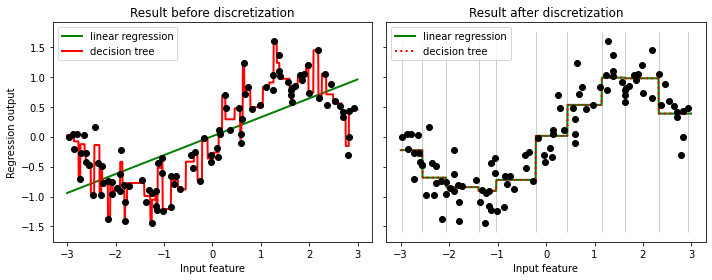

In [6]:
## predict with original dataset

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
reg = LinearRegression().fit(X,y)
ax1.plot(line, reg.predict(line), linewidth=2, color='green', label ='linear regression')
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X,y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red', label = 'decision tree')
ax1.plot(X[:,0], y, 'o', c='k')
ax1.legend(loc='best')
ax1.set_ylabel('Regression output')
ax1.set_xlabel('Input feature')
ax1.set_title('Result before discretization')

## predict with transformed dataset

line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth =2, color='green', linestyle='-',label='linear regression')
reg = DecisionTreeRegressor(min_samples_split=3, random_state =0).fit(X_binned,y)
ax2.plot(line,reg.predict(line_binned),linewidth=2, color='red',linestyle=':', label='decision tree')
ax2.plot(X[:,0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1,alpha=.2)
ax2.legend(loc='best')
ax2.set_xlabel('Input feature')
ax2.set_title('Result after discretization')

plt.tight_layout()
plt.show()